# Data Preparation for Machine Learning

**Data preparation** is a vital step in the machine learning pipeline. Just as visualization is necessary to understand the relationships in data, proper preparation or **data munging** is required to ensure machine learning models work optimally. 

The process of data preparation is highly interactive and itteraterative. A typical process includes at least the following steps:
1. **Visualization** of the dataset to understand the relationships and identify possible problems with the data.
2. **Data cleaning and transformation** to address the problems identified. It many cases, step 1 is then repeated to verify that the cleaning and transformaiton had the desired effect. 
3. **Construction and evaluation of a machine learning models**. Visualization of the results will often lead to understanding of further data preparation that is required; going back to step 1. 

In this lab you will learn the following: 
- Recode character strings to eliminate characters that will not be processed correctly.
- Find and treat missing values. 
- Set correct data type of each column. 
- Transform categorical features to create categories with more cases and coding likely to be useful in predicting the label. 
- Apply transformations to numereic features and the label to improve the distribution properties. 
- Locate and treat duplicate cases. 


## An example

As a first example you will prepare the automotive dataset. Careful preparation of this dataset, or any dataset, is required before atempting to train any machine learning model. This dataset has a number of problems which must be addressed. Further, some feature engineering will be applied. 

### Load the dataset

As a first step you must load the dataset. 

Execute the code in the cell below to load the packages required  to run this notebook. 

In [49]:
## Import packages
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=4) # Set the initial plot area dimensions

Execute the code in the cell below to load the dataset and print the first few rows of the data frame.

In [50]:
auto_prices = read.csv('Automobile price data _Raw_.csv', stringsAsFactors = FALSE)
head(auto_prices,20)

symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### Treat missing values

**Missing values** are a common problem in data set. Failure to deal with missing values before training a machine learning model will lead to biased training at best, and in many cases actual failure. The Python Scikit Learn package wil not procecss arrays with missing values. 

There are two problems that must be deal with when treating missing values:
1. First you must find the missing values. This can be difficult as there is no standard way missing values are coded. Some common possibilities for missing values are:
  - Coded by some particular character string, or numeric value like -999. 
  - A NULL value or numeric missing value such as a NaN. 
2. You must determine how to treat the missing values:
  - Remove featurers with substantial numbers of missing values. In many cases, such features are likely to have little infomation value. 
  - Remove rows with missing values. If there are only a few rows with missing values it might be easier and more certain to simply remove them. 
  - Impute values. Imputation can be done with simple algorithms such as replacing the missing values with the mean or median value. There are also complex statistical methods such as the expectation maximizaton (EM) or SMOTE algorithms. 
  - Use nearest neighbor values. Alternatives for nearest neighbor values include, aveaging, forward filling or backward filling. 
  
Carefully observe the first few cases from the data frame and notice that missing values are coded with a '?' character. Execute the code in the cell below to identify the columns with missing values.

In [51]:
#(auto_prices == '?').any
lapply(auto_prices, function(x){any(x == '?')})

$symboling
[1] FALSE

$normalized.losses
[1] TRUE

$make
[1] FALSE

$fuel.type
[1] FALSE

$aspiration
[1] FALSE

$num.of.doors
[1] TRUE

$body.style
[1] FALSE

$drive.wheels
[1] FALSE

$engine.location
[1] FALSE

$wheel.base
[1] FALSE

$length
[1] FALSE

$width
[1] FALSE

$height
[1] FALSE

$curb.weight
[1] FALSE

$engine.type
[1] FALSE

$num.of.cylinders
[1] FALSE

$engine.size
[1] FALSE

$fuel.system
[1] FALSE

$bore
[1] TRUE

$stroke
[1] TRUE

$compression.ratio
[1] FALSE

$horsepower
[1] TRUE

$peak.rpm
[1] TRUE

$city.mpg
[1] FALSE

$highway.mpg
[1] FALSE

$price
[1] TRUE

Execute the code in the cell below to display the data types of each column and a sample of the values.

In [52]:
str(auto_prices)

'data.frame':	205 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.of.

Compare the columns with missing values to their data types. In all cases, the columns with missing values have an `character` type as a result of using the '?' code. As a result, some columns that should be numeric (bore, stroke, horsepower, peak_rpm, and price) are coded as `character`.

The next question is how many missing values are in each of these `character` type columns? Execute the code in the cell below to display the counts of missing values. 

In [53]:
for(col in names(auto_prices)){
    if(is.character(auto_prices[,col])){
        count = sum(ifelse(auto_prices[,col] == '?', 1, 0))
        cat(paste(col, as.character(count), '\n'))
    }
}

normalized.losses 41 
make 0 
fuel.type 0 
aspiration 0 
num.of.doors 2 
body.style 0 
drive.wheels 0 
engine.location 0 
engine.type 0 
num.of.cylinders 0 
fuel.system 0 
bore 4 
stroke 4 
horsepower 2 
peak.rpm 2 
price 4 


The `normalize_losses` column has a significant number of missing values and will be removed. Columns that should be numeric, but contain missing values, are processed in the following manner:
1. The '?' values are replaced with R `NA` values.
2. Rows containing `NA` values are removed with `complete.cases`. 

Execute this code, noticing the resulting shape of the data frame. 

In [54]:
## Drop column with too many missing values
auto_prices[,'normalized_losses'] = NULL
## Remove rows with missing values, accounting for mising values coded as '?'
cols = c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
auto_prices[,cols] = lapply(auto_prices[,cols], function(x){ifelse(x == '?', NA, x)})
auto_prices = auto_prices[complete.cases(auto_prices[,cols]),]
dim(auto_prices)

[1] 195  26

The data set now contains 195 cases and 25 rows. 10 rows have been dropped by removing missing values. 

### Transform column data type

As has been previously noted, there are five columns in this dataset which do not have the correct type as a result of mising values. This is a common situation, as the methods used to automatically determine data type when loading files can fail when missing values are present. 

The code in the cell below itterates over a list of columns setting them to numeric. Execute this code and observe the resulting  types.

In [55]:
auto_prices[,cols] = lapply(auto_prices[,cols], as.numeric)
str(auto_prices[,cols])

'data.frame':	195 obs. of  5 variables:
 $ price     : num  13495 16500 16500 13950 17450 ...
 $ bore      : num  3.47 3.47 2.68 3.19 3.19 3.19 3.19 3.19 3.13 3.5 ...
 $ stroke    : num  2.68 2.68 3.47 3.4 3.4 3.4 3.4 3.4 3.4 2.8 ...
 $ horsepower: num  111 111 154 102 115 110 110 110 140 101 ...
 $ peak.rpm  : num  5000 5000 5000 5500 5500 5500 5500 5500 5500 5800 ...


### Feature engineering and transforming variables

In most cases, machine learning is not done with the raw features. Features are transformed, or combined to form new features in forms which are more predictive This process is known as **feature engineering**. In many cases, good feature engineering is more important than the details of the machine learning model used. It is often the case that good features can make even poor machine learning models work well, whereas, given poor features even the best machine learning model will produce poor results. Some common approaches to feature engineering include:
- **Transforming numeric variables** to improve their distribution properties to make them more covariate with other variables. This process can be applied not only features, but to labels for regression problems. Some common transformations inclcude, **logrithmic** and **power** included squares and squareroots. 
- **Aggregating categories** of categorical variables to reduce the number. Categorical features or labels with too many unique categories will limit the predictive power of a machine learning model. Aggregating categories can improve this situation, sometime greatly. However, one must be careful. It only makes sense to aggregate categories that are similar in the domain of the problem. Thus, domain expertise must be applied. 
- **Compute new features** from two or more existing features. These new features are often referred to as **interaction terms**. An interaction occurs when the behavior of say, the produce of the values of two features, is significantly more predictive than the two features by themselves. Consider the probability of purchase for a luxury mens' shoe. This probability depends on the interaction of the user being a man and the buyer being wealthy. As another example, consider the number of expected riders on a bus route. This value will depend on the interaction between the time of day and if it is a holiday. 

#### Aggregating categorical variables

When a dataset contains categorical variables these need to be investigated to ensure that each category has sufficient samples. It is commonly the case that some categories may have very few samples, or have so many similar categories as to be meaningless. 

As a specific case, you will examine the number of cylinders in the cars. Execute the code in the cell below to print a frequency table for this variable and examine the result. 

In [56]:
table(auto_prices[,'num.of.cylinders'])


 eight   five   four    six  three twelve 
     4     10    155     24      1      1 

Notice that there is only one car with three and twelve cylinders. There are only four cars with eight cylinders, and 10 cars with five cylinders. It is likely that all of these categories will not have statistically significant difference in predicting auto price. It is clear that these categories need to be aggregated. 

The code in the cell below uses a list with named elements to recode the number of cylinder categories into a smaller number categories. Notice that `out` vector is defined in advance. Execute this code and examine the resulting frequency table.

In [58]:
cylinder_categories = c('three' = 'three_four', 'four' = 'three_four', 
                    'five' = 'five_six', 'six' = 'five_six',
                    'eight' = 'eight_twelve', 'twelve' = 'eight_twelve')

out = rep('i', length.out = nrow(auto_prices))
i = 1
for(x in auto_prices[,'num.of.cylinders']){
    out[i] = cylinder_categories[[x]]
    i = i + 1
}
auto_prices[,'num.of.cylinders'] = out

table(auto_prices[,'num.of.cylinders'])


eight_twelve     five_six   three_four 
           5           34          156 

There are now three categories. One of these categories only has five members. However, it is likely that these autos will have different pricing from others.

Next, exectue the code in the cell below to make box plots of the new cylinder categories.

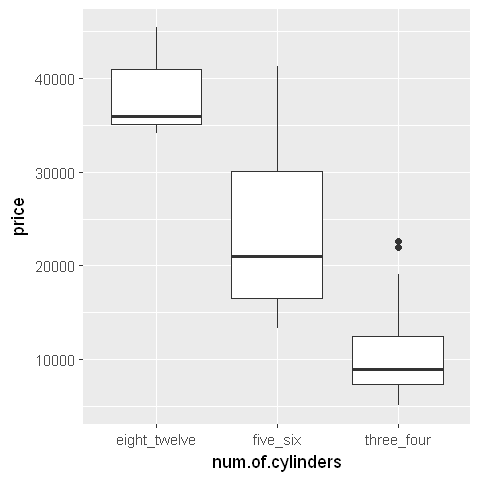

In [59]:
ggplot(auto_prices, aes(num.of.cylinders,price)) + 
       geom_boxplot()

Indeed, the price range of these categories is distinctive. It is likely that these new categories will be useful in predicting the price of autos. 

Now, execute the code in the cell below and examine the frequency table for the `body_style` feature.

In [61]:
table(auto_prices[,'body.style'])


convertible     hardtop   hatchback       sedan       wagon 
          6           8          63          94          24 

Two of these categories have a limited number of cases. These categories can be aggregated to increase the number of cases using a similar approach as used for the number of cylinders. Execute the code in the cell below to aggregate these categories.

In [63]:
body_cats = c('sedan' = 'sedan', 'hatchback' = 'hatchback', 'wagon' = 'wagon', 
             'hardtop' = 'hardtop_convert', 'convertible' = 'hardtop_convert')

out = rep('i', length.out = nrow(auto_prices))
i = 1
for(x in auto_prices[,'body.style']){
    out[i] = body_cats[[x]]
    i = i + 1
}
auto_prices[,'body.style'] = out

table(auto_prices[,'body.style'])


hardtop_convert       hatchback           sedan           wagon 
             14              63              94              24 

To investigate if this aggregation of categories was a good idea, execute the code in the cell below to display a box plot. 

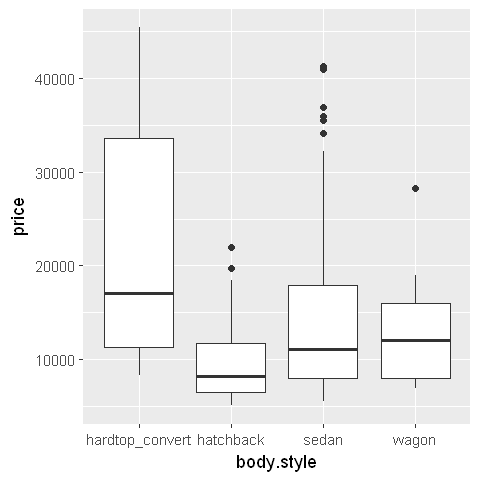

In [64]:
ggplot(auto_prices, aes(body.style,price)) + 
       geom_boxplot()  

The `hardtop_convert` category does appear to have values distinct from the other body style. 

#### Transforming numeric variables

To improve performance of machine learning models transformations of the values are often applied. Typically, transformations are used to make the relationships between variables more linear. In other cases, transformations are performed to make distributions closer to Normal, or at least more symmetric. These transformations can include taking logarithms, exponential transformations and power transformations. 

In this case, you will transform the label, the price of the car. Execute the code in the cell below to display and examine a histogram of the label. 

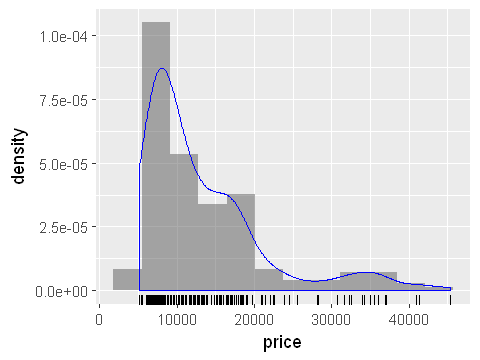

In [82]:
plot_hist = function(df, col = 'price', bins = 10){
    options(repr.plot.width=4, repr.plot.height=3) # Set the initial plot area dimensions
    bw = (max(df[,col]) - min(df[,col]))/(bins + 1)
    p = ggplot(df, aes_string(col)) + 
               geom_histogram(binwidth = bw, aes(y=..density..), alpha = 0.5) +
               geom_density(aes(y=..density..), color = 'blue') + 
               geom_rug()
    print(p)
}    
plot_hist(auto_prices)    

The distribution of auto price is both quite skewed to the left and multimodal. Given the skew and the fact that there are no values less than or equal to zero, a log transformation might be appropriate.

The code in the cell below displays a histogram of the logarithm of prices. Execute this code and examine the result.

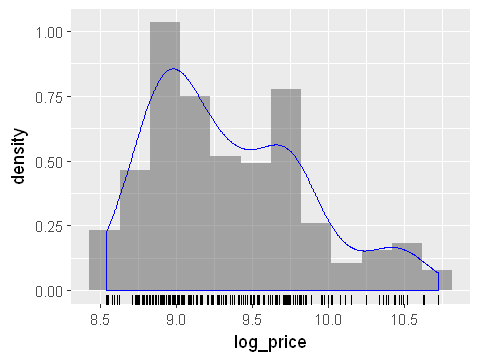

In [84]:
auto_prices[, 'log_price'] = log(auto_prices[,'price'])
plot_hist(auto_prices, col = 'log_price')

The distribution of the logarithm of price is more symmetric, but still shows some multimodal tendancy and skew. None the less, this is an improvement so we will use these values as our label.

The next question is, how does this transformation change the relationship between the label and some of the features? To find out, execute the code in the cell below. 

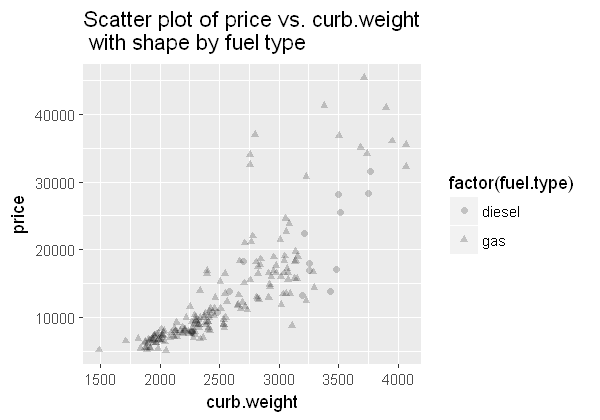

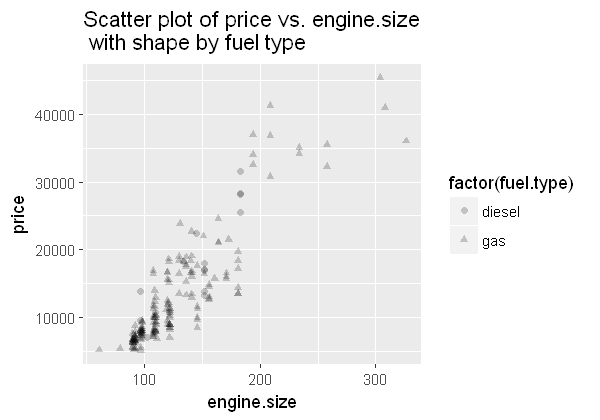

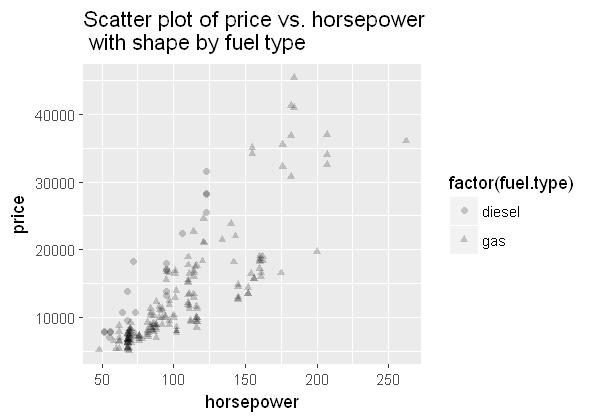

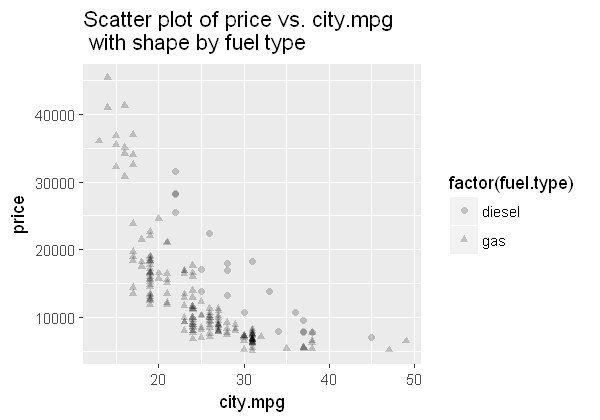

In [87]:
plot_scatter_sp = function(df, cols, col_y = 'price', alpha = 1.0){
    options(repr.plot.width=5, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col, col_y)) + 
                   geom_point(aes(shape = factor(fuel.type)), alpha = alpha) +
                   ggtitle(paste('Scatter plot of', col_y, 'vs.', col, '\n with shape by fuel type'))
        print(p)
    }
}

num_cols = c('curb.weight', 'engine.size', 'horsepower', 'city.mpg')
plot_scatter_sp(auto_prices, num_cols, alpha = 0.2)

Comparing the results to those obtained in the visualization lab, it does appear that the relationships between curb weight and log price and city MPG and log price are more linear. 

The relationship with the log price and categorical variables should likely also be investigted. It is also possible that some type of power transformation should be applied to, say horsepower or engine size. In the interest of brevity, these ideas are not pursued here. 

## Another example

Next, you will prepare the German credit data. Execute the code in the cell below  to load the dataset and print the head (first 5 rows) of the dataframe.

In [90]:
credit = read.csv('German_Credit.csv', stringsAsFactors = FALSE)
head(credit)

A1,A11,X6,A34,A43,X1169,A65,A75,X4,A93,...,A121,X67,A143,A152,X2,A173,X1,A192,A201,X1.1
6156361,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2051359,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
8740590,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3924540,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2
3115687,A14,36,A32,A46,9055,A65,A73,2,A93,...,A124,35,A143,A153,1,A172,2,A192,A201,1
8251714,A14,24,A32,A42,2835,A63,A75,3,A93,...,A122,53,A143,A152,1,A173,1,A191,A201,1


This dataset is a bit hard to understand. For a start, the column names are not human readable. 

### Recode character strings 

You have likely noticed that the the column names are  not human readable. This can be changed as was done for the pervious dataset. Execute the code in the cell below to add human-readable column names to the data frame. 

In [91]:
names(credit) = c('Customer_ID', 'checking_account_status', 'loan_duration_mo', 'credit_history', 
                  'purpose', 'loan_amount', 'savings_account_balance', 
                  'time_employed_yrs', 'payment_pcnt_income','gender_status', 
                  'other_signators', 'time_in_residence', 'property', 'age_yrs',
                  'other_credit_outstanding', 'home_ownership', 'number_loans', 
                  'job_category', 'dependents', 'telephone', 'foreign_worker', 
                  'bad_credit')
head(credit)

Customer_ID,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
6156361,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2051359,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
8740590,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3924540,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2
3115687,A14,36,A32,A46,9055,A65,A73,2,A93,...,A124,35,A143,A153,1,A172,2,A192,A201,1
8251714,A14,24,A32,A42,2835,A63,A75,3,A93,...,A122,53,A143,A152,1,A173,1,A191,A201,1


Next, there is a trickier problem to deal with. The current coding of the catigorical variables is impossible to understand. This makes interpreting these variables nearly impossible.  

The code in the cell below uses a list of dictionaries to recode the categorical features with human-readable text. The final dictionary in the list recodes good and bad credit as a binary variable, $\{ 0,1 \}$. Two iterators are used to appy the dictionary:
1. The `for` loop iterates over the columns and idexes the dictionary for the column. 
2. A list comprehension interates of the values in the column and uses the dictionary to map the codes to human-readable category names. 

Execute this code and examine the result: 

In [20]:
code_list = [['checking_account_status', 
              {'A11' : '< 0 DM', 
               'A12' : '0 - 200 DM', 
               'A13' : '> 200 DM or salary assignment', 
               'A14' : 'none'}],
            ['credit_history',
            {'A30' : 'no credit - paid', 
             'A31' : 'all loans at bank paid', 
             'A32' : 'current loans paid', 
             'A33' : 'past payment delays', 
             'A34' : 'critical account - other non-bank loans'}],
            ['purpose',
            {'A40' : 'car (new)', 
             'A41' : 'car (used)',
             'A42' : 'furniture/equipment',
             'A43' : 'radio/television', 
             'A44' : 'domestic appliances', 
             'A45' : 'repairs', 
             'A46' : 'education', 
             'A47' : 'vacation',
             'A48' : 'retraining',
             'A49' : 'business', 
             'A410' : 'other' }],
            ['savings_account_balance',
            {'A61' : '< 100 DM', 
             'A62' : '100 - 500 DM', 
             'A63' : '500 - 1000 DM', 
             'A64' : '>= 1000 DM',
             'A65' : 'unknown/none' }],
            ['time_employed_yrs',
            {'A71' : 'unemployed',
             'A72' : '< 1 year', 
             'A73' : '1 - 4 years', 
             'A74' : '4 - 7 years', 
             'A75' : '>= 7 years'}],
            ['gender_status',
            {'A91' : 'male-divorced/separated', 
             'A92' : 'female-divorced/separated/married',
             'A93' : 'male-single', 
             'A94' : 'male-married/widowed', 
             'A95' : 'female-single'}],
            ['other_signators',
            {'A101' : 'none', 
             'A102' : 'co-applicant', 
             'A103' : 'guarantor'}],
            ['property',
            {'A121' : 'real estate',
             'A122' : 'building society savings/life insurance', 
             'A123' : 'car or other',
             'A124' : 'unknown-none' }],
            ['other_credit_outstanding',
            {'A141' : 'bank', 
             'A142' : 'stores', 
             'A143' : 'none'}],
             ['home_ownership',
            {'A151' : 'rent', 
             'A152' : 'own', 
             'A153' : 'for free'}],
            ['job_category',
            {'A171' : 'unemployed-unskilled-non-resident', 
             'A172' : 'unskilled-resident', 
             'A173' : 'skilled',
             'A174' : 'highly skilled'}],
            ['telephone', 
            {'A191' : 'none', 
             'A192' : 'yes'}],
            ['foreign_worker',
            {'A201' : 'yes', 
             'A202' : 'no'}],
            ['bad_credit',
            {2 : 1,
             1 : 0}]]

for col_dic in code_list:
    col = col_dic[0]
    dic = col_dic[1]
    credit[col] = [dic[x] for x in credit[col]]
    
credit.head()    

,Customer_ID,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,1
1,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
2,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
3,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1
4,3115687,none,36,current loans paid,education,9055,unknown/none,1 - 4 years,2,male-single,...,unknown-none,35,none,for free,1,unskilled-resident,2,yes,yes,0


The categorical values are now coded in a human readable manner. 

### Remove duplicate rows

Duplicate cases can seriously bias the training of machine learning models. In simple terms, cases which are duplicates add undue weight to that case when training a machine learning model. Therefore, it is necessary to ensure there are no duplicates in the dataset before training a model.  

One must be careful when determining if a case is a duplicate or not. It is possible that some cases have identical values, particularly if most or all features are categorical. On the other hand, if there are columns with values guaranteed to be unique these can be used to detect and remove duplicates.

Another consideration when removing duplicate cases is determining which case to remove. If the duplicates have different dates of creation, the newest date is often selected. In the absence of such a criteria, the choice is often arbitrary. You may chose to keep the first case or the last case. 

The German credit data has a Customer ID column which should be unique. The presence of duplicates can be determined by comparing the number of rows to the number of unique values. The code in the cell below prints the shape of the data frame and the number of unique Customer ID values. Execute this code and examine the results.  

In [21]:
print(credit.shape)
print(credit.Customer_ID.unique().shape)

(1011, 22)
(999,)


There are 12 duplicate cases. These need to be located and the duplicates removed. In this case, the first instance will be kept. 

The code in the cell below removes these duplicates from the data frame inplace and the number of remaining rows and unique Customer IDs are printed. Execute this code and examine the results. 

In [22]:
credit.drop_duplicates(subset = 'Customer_ID', keep = 'first', inplace = True)
print(credit.shape)
print(credit.Customer_ID.unique().shape)

(999, 22)
(999,)


The duplicate rows have been successfully removed. 

### Feature engineering

Some feature engineering needs to be investigated to determine if any improvement in predictive power can be expected. From the previous data exploration, it is apparent that several of the numeric features had a strong left skew. A log transformaiton may help in a case like this. Execute the code in the cell below uses the Pandas `applymap` method to apply the `log` function to each element of several columns in the data frame. Execute this code.

In [23]:
credit[['log_loan_duration_mo', 'log_loan_amount', 'log_age_yrs']] = credit[['loan_duration_mo', 'loan_amount', 'age_yrs']].applymap(math.log)

Next, execute the code in the cell below to visualize the differences in the distributions of the untransformed and transformed variables for the two label values. 

log_loan_duration_mo


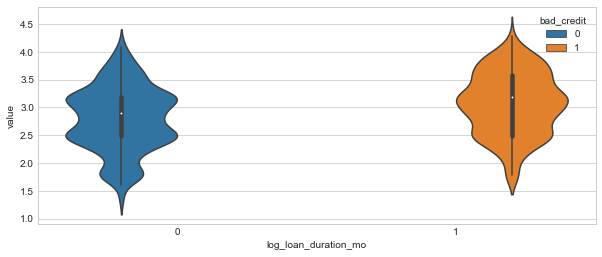

log_loan_amount


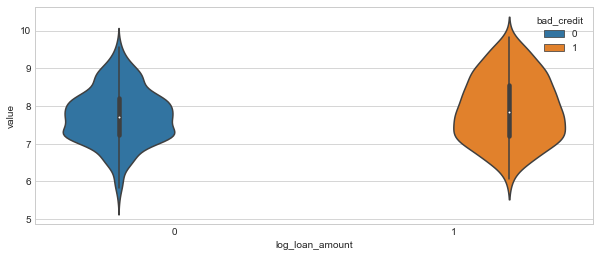

log_age_yrs


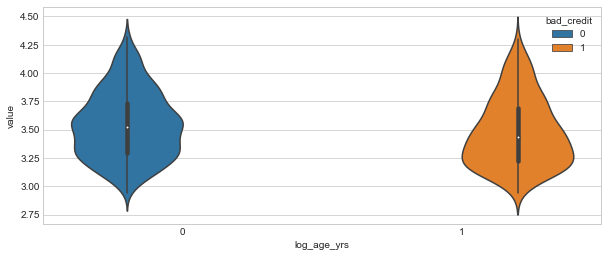

loan_duration_mo


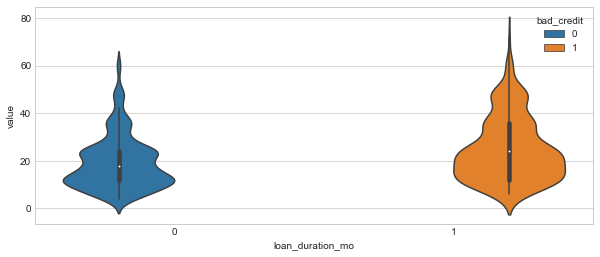

loan_amount


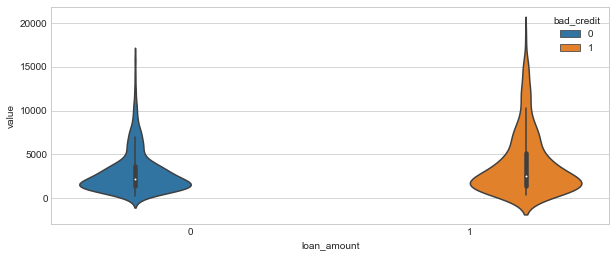

age_yrs


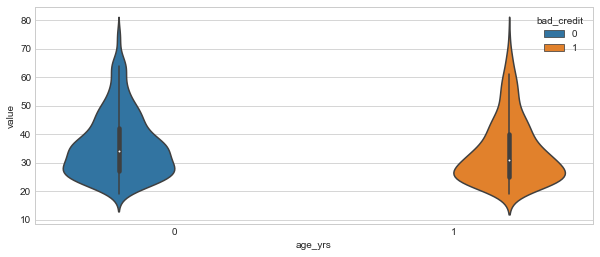

In [24]:
num_cols = ['log_loan_duration_mo', 'log_loan_amount', 'log_age_yrs',
                   'loan_duration_mo', 'loan_amount', 'age_yrs']

for col in num_cols:
    print(col)
    _ = plt.figure(figsize = (10,4))
    sns.violinplot(x= 'bad_credit', y = col, hue = 'bad_credit', 
                   data = credit)
    plt.ylabel('value')
    plt.xlabel(col)
    plt.show()

The log transformed features have more symmetric distributions. However, it does not appear that the separation of the label cases is improved. 

****
**Note:** Recalling the visualizatiion of the categorical features, there are quite a few categories with few cases. However, it is not clear how these categories can be reasonably combined. It may be the case that some of these categorical features are not terribly predictive.
****

## Summary

Good data preparation is the key to good machine learning performance. Data preparation or data munging is a time interactive and iterative process. Continue to visualize the results as you test ideas. Expect to try many approaches, reject the ones that do not help, and keep the ones that do. In summary, test a lot of ideas, fail fast, keep what works. The reward is that well prepared data can improve the performance of almost any machine learning algorithm.